In [1]:
import pandas as pd
data_ = pd.read_csv('google_comment_ckiplab.csv', sep='|')

In [2]:
data_.head()

,author,grade,comment,tokens_origin,tokens_str,tokens_list
0,su H,1,貨運慢到天荒地老，電話打了無數次才接，接了說會禮拜一到，結果也沒有，所有貨運公司中最爛的服務態度！,貨運 慢 到 天荒地老 ， 電話 打 了 無數 次 才 接 ， 接 了 說 會 禮拜一 到 ...,貨運 慢 到 天荒地老 電話 打 了 無數 次 才 接 接 了 說 會 禮拜一 到 結果 也...,"['貨運', '慢', '到', '天荒地老', '電話', '打', '了', '無數',..."
1,黃彩雲,4,真是抱歉，這晚只是為了帶孩子感受護國宮安魂路祭活動，停留在物流所大門前，並不是真的有去物流所...,真是 抱歉 ， 這 晚 只是 為 了 帶 孩子 感受 護國宮 安魂 路祭 活動 ， 停留 在...,真是 抱歉 這 晚 只是 為 了 帶 孩子 感受 護國宮 安魂 路祭 活動 停留 在 物流所...,"['真是', '抱歉', '這', '晚', '只是', '為', '了', '帶', '孩..."
2,Chriz Wu,1,會讓您送來的電視直接變廢五金喔^^,會 讓 您 送來 的 電視 直接 變廢 五金 喔 ^^,會 讓 您 送來 的 電視 直接 變廢 五金 喔,"['會', '讓', '您', '送來', '的', '電視', '直接', '變廢', '..."
3,Qian Chen,1,一顆心都嫌多 爛死了 貨物已經到站所一個禮拜還在配送中？昨天打給客服跟我說最晚今天送達結果騙...,一 顆 心 都 嫌 多 爛死 了 貨物 已經 到站 所 一 個 禮拜 還 在 配送 ...,一 顆 心 都 嫌 多 爛死 了 貨物 已經 到站 所 一 個 禮拜 還 在 配送 中 昨天...,"['一', '顆', '心', '都', '嫌', '多', '爛死', '了', '貨物'..."
4,駱彥華,1,態度部分就不提，把人家寄物件掉在路上，被熱心民眾送到手上，物流還完全不知情，照上面電話打去告...,態度 部分 就 不 提 ， 把 人家 寄 物件 掉 在 路 上 ， 被 熱心 民眾 送 到 ...,態度 部分 就 不 提 把 人家 寄 物件 掉 在 路 上 被 熱心 民眾 送 到 手 上 ...,"['態度', '部分', '就', '不', '提', '把', '人家', '寄', '物..."


In [3]:
data_.shape[0]

37383

In [4]:
data_ =data_[data_.grade!='None']

In [5]:
data_.groupby('grade').count()

,author,comment,tokens_origin,tokens_str,tokens_list
grade,,,,,
1,3488,3488,3488,3488,3488
2,1524,1524,1524,1524,1524
3,5068,5068,5068,5068,5068
4,10685,10685,10685,10685,10685
5,16611,16611,16611,16611,16611


# Tokenize and Clean data 斷詞與資料清理

It has been done in the tokenization step

我們有的資料是: 一段留言文字 經過斷詞處理 詞之間用空格隔開 一個字的詞也要保留 標點符號清除掉

# 選取我們要用到的兩個欄位

In [6]:
data = data_[['grade','tokens_str']].copy()

## Rename column "token_str" to "tokens" 比較簡潔的欄位名稱

In [7]:
data = data.rename(columns = {'tokens_str':'tokens'})

In [8]:
data.head()

,grade,tokens
0,1,貨運 慢 到 天荒地老 電話 打 了 無數 次 才 接 接 了 說 會 禮拜一 到 結果 也...
1,4,真是 抱歉 這 晚 只是 為 了 帶 孩子 感受 護國宮 安魂 路祭 活動 停留 在 物流所...
2,1,會 讓 您 送來 的 電視 直接 變廢 五金 喔
3,1,一 顆 心 都 嫌 多 爛死 了 貨物 已經 到站 所 一 個 禮拜 還 在 配送 中 昨天...
4,1,態度 部分 就 不 提 把 人家 寄 物件 掉 在 路 上 被 熱心 民眾 送 到 手 上 ...


# Split dataset: Train, Test 

切訓練 測試資料集

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train, test = train_test_split(data, test_size = 0.1, stratify=data['grade'], random_state=123)

In [11]:
train.shape

(33638, 2)

In [12]:
test.shape

(3738, 2)

In [13]:
train.head()

,grade,tokens
600,2,小貴
15577,4,凡爾賽 玫瑰 那 提 好喝
25769,4,不錯 的 環境 但是 逛 的 環境 路線 有些 複雜 美食 選項 有點 少
4849,1,由 提供 翻譯 速度 很 快 一下子 就 上架 不 放 就 是 不 放 原始 評論 速度 很...
2786,5,由 提供 翻譯 親子 互動 的 好 地方 很多 在地 商品 原始 評論 互动 的 好 地方 ...


In [14]:
test.head()

,grade,tokens
25375,3,比 想像 中小 很多 遊樂 設施 也 沒有 特別 多 感覺 真的 是 適合 親子 和 小朋友...
32173,5,蠻 漂亮 的 生態 園區 缺點 就 是 夏天 去 實在 有夠 熱 暑假 平日 還是 會 大排長龍
20735,3,奧爾 森林 學堂 空中 步道 貓頭鷹 森林 步道 民 建 貓頭鷹 咕咕屋 標高 公頃 兒童 ...
36684,5,由 提供 翻譯 散步 的 好 地方 原始 評論 散步 的 好 地方
11136,5,服務 非常 好


## Stratefied sampling 

抽樣是否有分層隨機?

In [15]:
train.groupby('grade').size()

grade
1     3139
2     1372
3     4561
4     9616
5    14950
dtype: int64

In [16]:
test.groupby('grade').size()

grade
1     349
2     152
3     507
4    1069
5    1661
dtype: int64

# Input format preprocess輸入格式準備

## Tokenizer 將字詞做索引編碼

做 詞索引

vectorize the text samples into a 2D integer tensor

keras.preprocessing.text.Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [18]:
# max_features based on word frequency
# max_features = 50000 # total vocabulary: 58975 你可以自訂字彙個數選取出現頻率最高的數萬個詞
# tokenizer = Tokenizer(num_words = max_features) 

# if you want to use all vocabulary, don't specify num_words使用所有的詞數
tokenizer = Tokenizer()
tokenizer.fit_on_texts( data['tokens'])
max_features = len(tokenizer.word_index) # embedding layer needs the max_features

In [19]:
max_features

28251

In [20]:
[item for idx,item in enumerate(tokenizer.word_index.items()) if idx < 20]

[('的', 1),
 ('很', 2),
 ('好', 3),
 ('有', 4),
 ('是', 5),
 ('不', 6),
 ('提供', 7),
 ('一', 8),
 ('評論', 9),
 ('由', 10),
 ('了', 11),
 ('原始', 12),
 ('翻譯', 13),
 ('也', 14),
 ('都', 15),
 ('好吃', 16),
 ('服務', 17),
 ('地方', 18),
 ('還', 19),
 ('來', 20)]

In [21]:
len(tokenizer.word_index)

28251

In [22]:
# tokenizer.word_counts

## convert text to sequece of word index文章的字詞用詞索引值替換

In [23]:
sequences_train = tokenizer.texts_to_sequences(train['tokens'])
sequences_test = tokenizer.texts_to_sequences(test['tokens'])

In [24]:
# word becomes index number!
sequences_train[0]

[1541]

In [25]:
# sequences_train.iloc[0]

## Padding(文章填塞變成長度一樣): Make the length of every document equal to 350


## 每個評論必須長度一致 最多為350個字詞

In [26]:
max_document_length = 250
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(sequences_train, maxlen=max_document_length)
X_test = sequence.pad_sequences(sequences_test, maxlen=max_document_length)

In [27]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [28]:
X_train[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [29]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (33638, 250)
X_test shape: (3738, 250)


# Convert label using one-hot representation輸出資料格式轉換

    轉成用2個節點表達兩類
    類別0: [1 0]  
    類別1: [0 1]  


    如果是3類別用3個節點表之:
    類別0: [1 0 0]  
    類別1: [0 1 0]  
    類別2: [0 0 1]


負面情緒Negative 0 --> [1 0] 

正面情緒Positive 1 --> [0 1] 

In [30]:
from tensorflow.keras.utils import to_categorical

nb_classes = 6 #不使用第0類

Y_train = to_categorical(train[ 'grade'  ], nb_classes)
Y_test = to_categorical(test[ 'grade'  ], nb_classes)

In [31]:
Y_test[0:2]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [32]:
test.head()

,grade,tokens
25375,3,比 想像 中小 很多 遊樂 設施 也 沒有 特別 多 感覺 真的 是 適合 親子 和 小朋友...
32173,5,蠻 漂亮 的 生態 園區 缺點 就 是 夏天 去 實在 有夠 熱 暑假 平日 還是 會 大排長龍
20735,3,奧爾 森林 學堂 空中 步道 貓頭鷹 森林 步道 民 建 貓頭鷹 咕咕屋 標高 公頃 兒童 ...
36684,5,由 提供 翻譯 散步 的 好 地方 原始 評論 散步 的 好 地方
11136,5,服務 非常 好


# Word Embedding詞嵌入、詞向量

    詞嵌入層，負責將每個字詞索引，轉換為128維度的向量表達。
    每個字都有其128維度的向量喔!

# Design Keras CNN model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import metrics

In [34]:
# max_features # 前面有定義:索引字彙表最大字數+1
# max_document_length = 350 # 前面有定義:一篇文章350個詞

embedding_vecor_length = 128 # vector詞向量維度
nb_classes = 6 # 兩個類別的分類任務!

# 初始化一個空的深度模型
model = Sequential()

# embedding layer
model.add(Embedding(input_dim = max_features+1, input_length= max_document_length, output_dim = 128))

# Convolution layer
model.add(Convolution1D(activation="relu", filters=520, kernel_size=3, strides=1, padding="valid"))

# MaxPooling layer
model.add(MaxPooling1D(pool_size = 2))

# flatten 
model.add(Flatten())

# dense layer隱藏層#1 有350個節點(node,神經元neuron) 激發函數:relu
model.add(Dense(250)) 
model.add(Dropout(0.25)) 
model.add(Activation('relu'))

# dense layer隱藏層#2 有120個節點(node,神經元neuron) 激發函數:relu
model.add(Dense(120)) 
model.add(Dropout(0.2)) 
model.add(Activation('relu'))

# output layer輸出層 有2個節點(node,神經元neuron) 激發函數:softmax 多類別任務使用softmax
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 128)          3616256   
_________________________________________________________________
conv1d (Conv1D)              (None, 248, 520)          200200    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 124, 520)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64480)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               16120250  
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250)               0

## Compile model

In [36]:
# compile
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics= [ 'acc' ])

# Train 

## Checkpoint 

In [37]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [38]:
# Save best Neural Network Model Only
# save_best_only=True

# Save weights only: 
# save_weights_only=True

saved_best_path = 'sentiment_best_model.hdf5'
# saved_best_path = log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'

checkpoint = ModelCheckpoint(saved_best_path,
                             #monitor='val_loss',
                             monitor='val_acc',
                             save_best_only=True, 
                             save_weights_only=False, 
                             #save_freq=1,
                             verbose=1)

##  Early stopping

In [39]:
# If val_loss or val_acc doesn't improve for 5 epochs, the training will stop.
# val_loss or val_acc 沒有改善，則提早結束訓練
early_stopping = EarlyStopping(
                              #  monitor='val_loss',
                               monitor='val_acc', 
                               min_delta=0, 
                               patience=7, 
                               verbose=1, 
                               restore_best_weights=True)  

## Start training

In [40]:
%%time
# If your RAM is large, set batch_size = 64
# CNN takes about 25 minutes per epoch based on i7 CPU, 16GB RAM
# MLP 

hist = model.fit(X_train, Y_train, batch_size= 128, epochs=20, validation_split=0.1, callbacks=[checkpoint, early_stopping])

Train on 30274 samples, validate on 3364 samples
Epoch 1/20
30208/30274 [============================>.] - ETA: 0s - loss: 1.1400 - acc: 0.4985
Epoch 00001: val_acc improved from -inf to 0.57491, saving model to sentiment_best_model.hdf5
30274/30274 [==============================] - 46s 2ms/sample - loss: 1.1396 - acc: 0.4987 - val_loss: 0.9909 - val_acc: 0.5749
Epoch 2/20
30208/30274 [============================>.] - ETA: 0s - loss: 0.9187 - acc: 0.5988
Epoch 00002: val_acc did not improve from 0.57491
30274/30274 [==============================] - 47s 2ms/sample - loss: 0.9190 - acc: 0.5988 - val_loss: 1.0097 - val_acc: 0.5514
Epoch 3/20
30208/30274 [============================>.] - ETA: 0s - loss: 0.7879 - acc: 0.6644
Epoch 00003: val_acc did not improve from 0.57491
30274/30274 [==============================] - 50s 2ms/sample - loss: 0.7876 - acc: 0.6646 - val_loss: 1.0957 - val_acc: 0.5559
Epoch 4/20
30208/30274 [============================>.] - ETA: 0s - loss: 0.6662 - acc: 

# Accuracy

## Test the best model

In [41]:
score, acc = model.evaluate(X_test, Y_test, batch_size= 16)
print('Test score:', score)
print('Test accuracy:', acc)

3738/3738 [==============================] - 3s 844us/sample - loss: 0.9855 - acc: 0.5685
Test score: 0.9855241570771219
Test accuracy: 0.5684858


In [42]:
import numpy as np

In [43]:
# predict classes
# Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
    
preds = np.argmax(model.predict(X_test), axis=-1)

In [44]:
preds

array([5, 4, 5, ..., 1, 5, 5], dtype=int64)

## Classification Report

In [45]:
# scikit learn provides a lot of usful function
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
accuracy_score(test[ 'grade' ], preds)

0.0

In [47]:
print(classification_report(test[ 'grade' ], preds))

ValueError: Mix of label input types (string and number)

## Confusion Matrix  

分類結果之混和矩陣

In [48]:
# Compute confusion matrix
confusion_matrix(test[ 'grade'  ], preds)

ValueError: Mix of label input types (string and number)

# Plot training and validation accuracy

繪圖 觀看模型訓練的收斂(converge)

In [59]:
import pandas as pd
%matplotlib inline 

In [60]:
hist_info = pd.DataFrame(hist.history)

In [61]:
hist_info

,loss,acc,val_loss,val_acc
0,1.139616,0.498712,0.990932,0.574911
1,0.918997,0.598765,1.009746,0.551427
2,0.787571,0.664564,1.095674,0.555886
3,0.666483,0.721807,1.199901,0.533888
4,0.549717,0.773238,1.435180,0.527943
5,0.451099,0.817071,1.623412,0.515161
6,0.375378,0.847955,2.009483,0.495838
7,0.320034,0.870285,2.470898,0.501189


<AxesSubplot:>

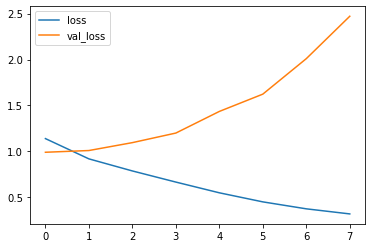

In [62]:
hist_info[['loss','val_loss']].plot()

<AxesSubplot:>

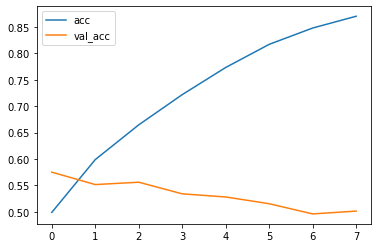

In [63]:
hist_info[['acc','val_acc']].plot()

## Save tokenizer

In [64]:
import pickle

In [65]:
pickle.dump(tokenizer, open('sentiment_tokenizer_gm.pickle', 'wb'))

## Read tokenizer

In [66]:
tokenizer = pickle.load(open('sentiment_tokenizer_gm.pickle', 'rb'))

## Save model

In [67]:
model.save('sentiment_best_model_gm.hdf5')

## Read model

In [69]:
import pickle
tokenizer = pickle.load(open('sentiment_tokenizer_gm.pickle', 'rb'))
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import load_model

In [70]:
model = load_model('sentiment_best_model_gm.hdf5')

# How to use trained model?怎麼使用模型?

寫成一個函數呼叫使用(All in one function)

In [71]:
import jieba
import re
# 輸入文字有些會含有特殊符號會出現在文字中，去除之，否則會報錯
# 中文編碼介於\u4e00-\u9fa5之間(unicode)
chinese_word_regex = re.compile(r'[\u4e00-\u9fa5]+')

# get sentiment probability
def get_sentiment_proba( text ):
    
    tokens = jieba.lcut(text, cut_all=False)
    # remove some characters
    tokens = [x for x in tokens if chinese_word_regex.match(x)]
    tokens = [tokens]
    # print(tokens)
    
    # Index the document
    text_seq = tokenizer.texts_to_sequences(tokens)
    # Pad the document
    max_document_length = 250
    text_pad = sequence.pad_sequences(text_seq, maxlen= max_document_length)

    result = model.predict(text_pad)

    response = {
                '1': round(float(result[0, 1]), 2),
                '2': round(float(result[0, 2]), 2),
                '3': round(float(result[0, 3]), 2),
                '4': round(float(result[0, 4]), 2),
                '5': round(float(result[0, 5]), 2),
                }
    # Note that result is numpy format and it should be convert to float


    grade = round((result[0, 1]*0 + result[0, 2]*.25 + result[0, 3]*.5 + result[0, 4]*.75 + result[0, 5]*1)/1,2)

    return grade

In [72]:
new_text = '速度很快，昨天下單，今天上午就到啦，看著挺不錯。'
get_sentiment_proba( new_text )

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Cons9\AppData\Local\Temp\jieba.cache
Loading model cost 0.704 seconds.
Prefix dict has been built successfully.


0.78

In [73]:
new_text = '已經買了這種蘋果好多次了，寶寶喜歡上了這款蘋果，一直選擇這款'
get_sentiment_proba( new_text )

0.92

In [74]:
new_text = '被認為是史上最偉大籃球員之一的布萊恩（Kobe Bryant）於美西時間26日上午10時，死於直升機墜機意外，享年41歲，機上另外4人也全數罹難。布萊恩的死訊，讓全球體育界一片黑暗，NBA開賽時球員紛紛向他致敬、痛哭失聲；俠客歐尼爾（Shaquille ONeal）等人也紛紛發文悼念布萊恩。'

get_sentiment_proba( new_text )

0.12

In [75]:
new_text = '不喜歡這款產品'

get_sentiment_proba( new_text )

0.67